# PROJECT 02: IMAGE PROCESSING

### NAME:  VÕ ANH QUÂN
### ID:    21127147
### CLASS: 21CLC05

In [39]:
# Note before coding
# không dùng các dòng for
# lật ảnh: reverse các cột, slicing trên các cột []
# đưa về ảnh xám: RGB to grayscale
# cắt ảnh: tính trung tâm 
# dùng slicing th: dọc, tw: ngang, slicing [th-1: th], [th: th + 1] ...

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Initial image

## Adjust brightness
- Modifying brightness simply means add a scalar to the image's matrix, we add or subtract a value to R, G, B in every single color point. 
- Add means increasing brightness while subtract means decreasing.
- Use np.clip in numpy to make sure the statistic does not overflow. It helps keep the number in range [0, 255].


### Increase brightness


In [41]:
def increase_brightness(img, value):
    img_arr = np.array(img)
    brightened_img = img_arr + float(value)
    brightened_img = np.clip(brightened_img, 0, 255).astype(np.uint8)
    return brightened_img
    
# brightValue = 30
# brightened_img = increase_brightness(img, brightValue)
# plt.imshow(brightened_img)
# plt.show

### Decrease brightness

In [42]:
def decrease_brightness(img, value):
    darkened_img = np.array(img) - float(value)
    darkened_img = np.clip(darkened_img, 10, 255).astype(np.uint8)
    return darkened_img

# dark_val = 20
# darkened_img = decrease_brightness(img, dark_val)
# plt.imshow(darkened_img)
# plt.show()

## Adjust contrast

- Similar to changing brightness, adjusting contrast simply means multiplying a scalar to image's matrix instead of adding or subtracting.
- Use np.clip to keep the statistics in acceptable range [0, 255]

In [43]:
def adjust_contrast(img, value):
    new_img = np.array(img) * float(value)
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)
    return new_img

# contrast_val = 1.5
# new_img = adjust_contrast(img, contrast_val)
# plt.imshow(new_img)
# plt.show()

## Upside down image

In [44]:
def upside_down_img(img):
    return img[::-1]
# upside_down_img = img[::-1]
# plt.imshow(upside_down_img)
# plt.show()

## Reveresed image

In [45]:
def flip_left_right(img):
    # init reversed_img as contains all zero value as the same size as img
    reversed_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    # reversed_img = np.copy(img)
    reversed_img = np.fliplr(img)
    return reversed_img

# print("Reversed image: ")
# plt.imshow(reversed_img)
# plt.show()


## Convert to grayscale

In [46]:
def rgb_to_grayscale(img):
    # Get every color channel (R, G, B) from the matrix img.
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    # Calculate new R, G, B.
    new_img = 0.21 * R + 0.72 * G + 0.07 * B
    # new_img = (R + G + B)/3
    new_img = new_img.astype(np.uint8)
    return new_img

# grayscale_img = rgb_to_grayscale(img)
# plt.imshow(grayscale_img, cmap = 'gray')
# plt.show()

## Convert to sepia image

In [47]:
def rgb_to_sepia(img):
    # get R, G, B array from img.
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    # apply new values to every single color channel.
    # use np.clip to keep the values in acceptable range.
    new_R = 0.393 * R + 0.769 * G + 0.189 * B
    new_R = np.clip(new_R, 0, 255)

    new_G = 0.349 * R + 0.686 * G + 0.168 * B
    new_G = np.clip(new_G, 0, 255)

    new_B = 0.272 * R + 0.534 * G + 0.131 * B
    new_B = np.clip(new_B, 0, 255)
    # create zeros-liked array and apply new color channels to it.
    new_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    new_img[:, :, 0] = new_R
    new_img[:, :, 1] = new_G
    new_img[:, :, 2] = new_B
    new_img = new_img.astype(np.uint8)
    return new_img

# sepia_img = rgb_to_sepia(img)
# plt.imshow(sepia_img)
# plt.show()

## Blurred image

In [48]:
def gaussian_blur(img):
    # kernel = np.ones((3,3)) / 9
    kernel = np.array([[[1], [2], [1]],
                       [[2], [4], [2]],
                       [[1], [2], [1]]]) / 16
    img_array = np.array(img, dtype=np.float32)
    padded_img = np.zeros((img_array.shape[0] + 2, img_array.shape[1] + 2, img_array.shape[2]))
    # Assign img to the center of padded_img matrix 
    padded_img[1:-1, 1:-1, :] = img_array
    blurred_img_array = np.zeros_like(img_array)
    for col in range(0, img_array.shape[0]):
            for row in range(0, img_array.shape[1]):
                # Create a 3x3 region suroundding the current pixel
                region_3x3 = padded_img[col:col + 3, row:row + 3]
                # Apply gaussian blur
                blurred_pixel = np.sum(region_3x3 * kernel, axis=(0, 1))
                # Assign blurred pixel to the current pixel
                blurred_img_array[col, row] = blurred_pixel
    new_img = blurred_img_array.astype(np.uint8)
    return new_img


# blurred_img = gaussian_blur(img)
# plt.imshow(blurred_img)
# plt.show()


    

In [49]:
def sharpen(img):
    kernel = np.array([[[0], [-1], [0]],
                       [[-1], [5], [-1]],
                       [[0], [-1], [0]]])
    img_array = np.array(img, dtype=np.float32)
    padded_img = np.zeros((img_array.shape[0] + 2, img_array.shape[1] + 2, img_array.shape[2]))
    # Assign img to the center of padded_img
    padded_img[1:-1, 1:-1, :] = img_array
    sharpen_img_array = np.zeros_like(img_array)
    for col in range(0, img_array.shape[0]):
            for row in range(0, img_array.shape[1]):
                # Create the 3x3 region surrounding the current pixel 
                region_3x3 = padded_img[col:col + 3, row:row + 3]
                # Apple sharpen kernel
                sharpen_pixel = np.sum(region_3x3 * kernel, axis=(0, 1))
                # Lưu kết quả vào mảng ảnh sau khi làm mờ
                sharpen_img_array[col, row] = sharpen_pixel
    sharpen_img_array = np.clip(sharpen_img_array, 0, 255)
    new_img = sharpen_img_array.astype(np.uint8)
    return new_img

# sharpen_img = sharpen(blurred_img)
# plt.imshow(sharpen_img)
# plt.show()


## Cropped image

In [50]:
def center_crop(img, height_crop, width_crop):
    height = img.shape[0]
    width = img.shape[1]
    # calculate the start and end point of two dimensions.
    x_start = (width - width_crop) // 2
    x_end = x_start + width_crop
    y_start = (height - height_crop) // 2
    y_end = y_start + height_crop

    new_img = img[y_start:y_end, x_start:x_end]
    return new_img.astype(np.uint8)

# height_crop = 300
# width_crop = 300
# new_img = center_crop(img, height_crop, width_crop)
# plt.imshow(new_img)
# plt.show()

## Circular-cropped image

In [51]:
def circular_crop(img, center, radius):
    y, x = np.ogrid[:img.shape[0], :img.shape[1]]
    # Apply circle formula.
    distances = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    mask = distances <= radius
    # Stack the mask matrix so that we can multiply it to the img.
    mask_3d = np.stack([mask] * 3, axis=-1)
    new_img = img * mask_3d
    return new_img.astype(np.uint8)

# center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
# radius = img.shape[0] / 2
# new_img = circular_crop(img, center, radius)
# plt.imshow(new_img)
# plt.show()


## Ellipsed-cropped image

In [52]:
def ellipsed_crop(img, center, axes = [320, 175], degree = 45):
    y, x = np.ogrid[:img.shape[0], :img.shape[1]]
    alpha = np.deg2rad(degree)
    cos = np.cos(alpha)
    sin = np.sin(alpha)
    
    # create 45 degree ellips crop using ellip formula.
    new_y = -(x - center[0]) * sin + (y - center[1]) * cos
    new_x = (x - center[0]) * cos + (y - center[1]) * sin

    new_distances = (new_x / axes[0]) ** 2 + (new_y / axes[1]) ** 2
    mask_1 = new_distances <= 1

    # create -45 degree ellips crop using ellip formula.
    alpha_2 = np.deg2rad(-degree)
    cos = np.cos(alpha_2)
    sin = np.sin(alpha_2)

    new_y = -(x - center[0]) * sin + (y - center[1]) * cos
    new_x = (x - center[0]) * cos + (y - center[1]) * sin

    new_distances = (new_x / axes[0]) ** 2 + (new_y / axes[1]) ** 2
    mask_2 = new_distances <= 1

    # combine two matrix to create double ellips crop matrix
    # then stack it and multiply it to the img matrix.
    mask = mask_1 + mask_2
    mask_3d = np.stack([mask] * 3, axis=-1)
    new_img = img * mask_3d

    return new_img.astype(np.uint8)

# center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
# ellips_crop_img = ellipsed_crop(img, center)
# plt.imshow(ellips_crop_img)
# plt.show()


In [53]:
# process exported file's name to be compatible with features
def export_file(img, pic_name, process):
    pos = pic_name.find(".")
    pic_name =  pic_name[:pos] + process + pic_name[pos:]
    if(process == "_grayscale"):
        plt.imsave(pic_name, img.astype('uint8'), cmap='gray')
    else:
        plt.imsave(pic_name, img.astype('uint8'))



---------- MENU ----------
1: Thay đổi độ sáng
2: Thay đổi độ tương phản
3: Lật ảnh (ngang - dọc)
4: Chuyển đổi ảnh RGB thành ảnh xám/ sepia
5: Làm mờ/ làm sắc nét
6: Cắt ảnh theo kích thước (cắt ở trung tâm)
7: Cắt ảnh theo khung hình tròn
8: Cắt ảnh theo khung là 2 hình ellip chéo nhau

INPUT IMAGE:


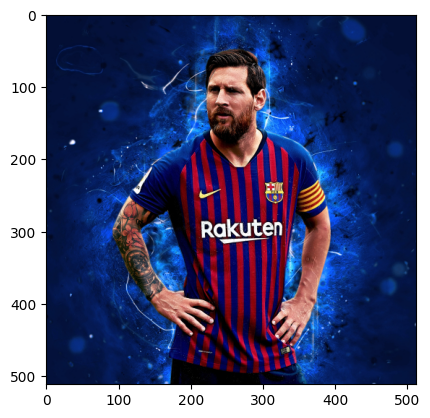

BRIGHTER IMAGE:


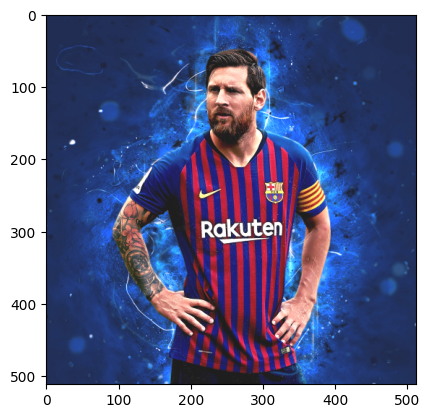

DARKER IMAGE:


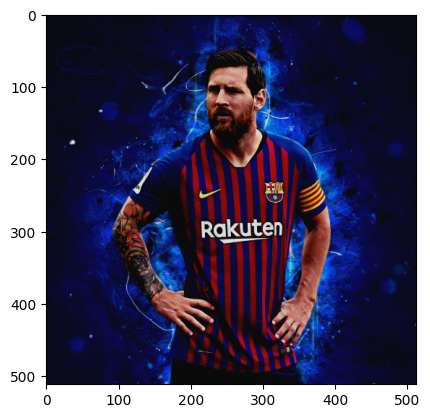

CONTRAST-ADJUSTED IMAGE:


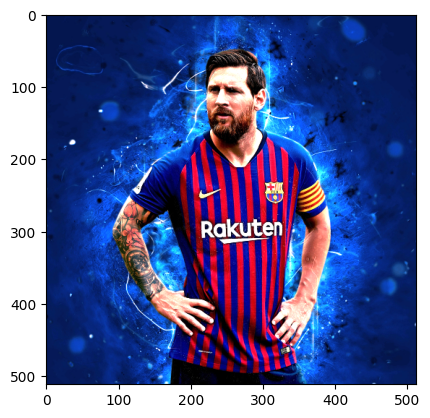

UPSIDE-DOWN IMAGE:


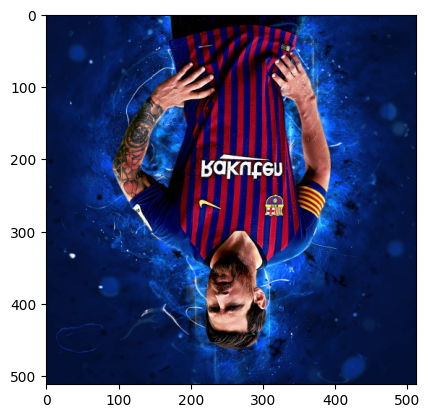

LEFT-RIGHT FLIPPED IMAGE:


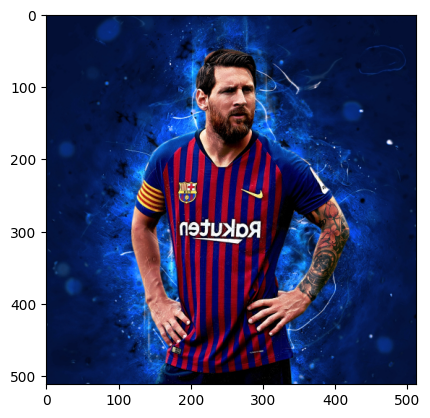

GRAYSCALE IMAGE:


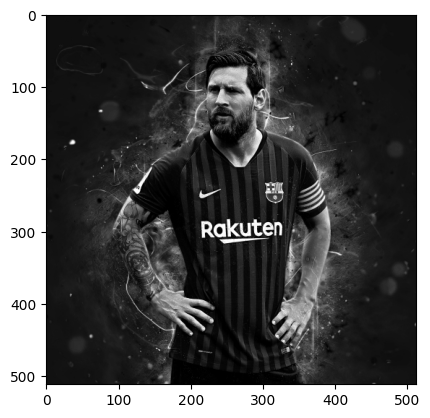

SEPIA IMAGE:


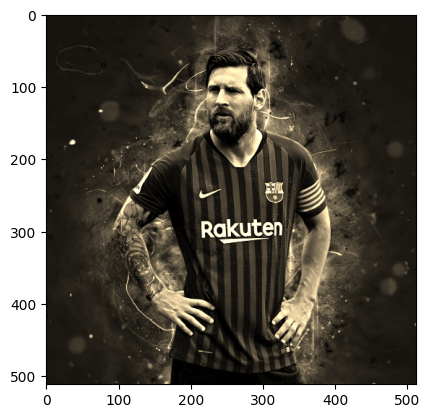

BLURRED IMAGE:


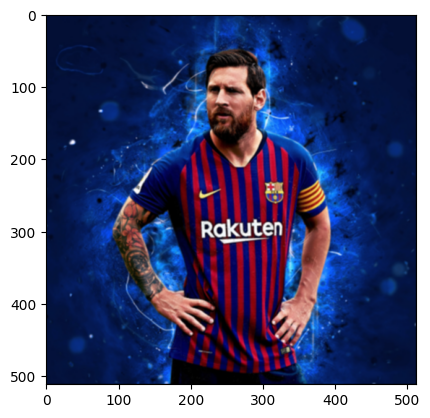

SHARPEN IMAGE: 


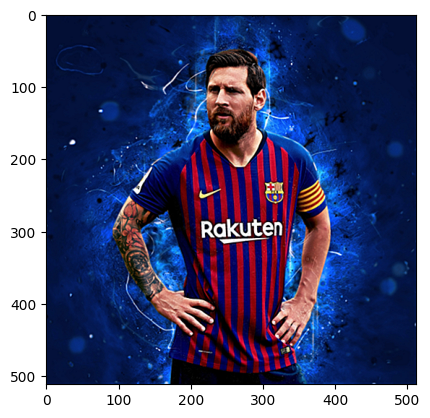

CENTER-CROPPED IMAGE: 


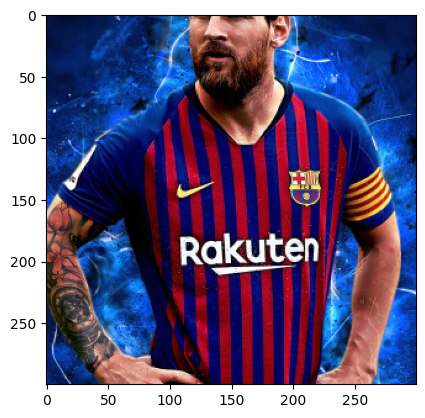

CIRCULAR-CROPPED IMAGE: 


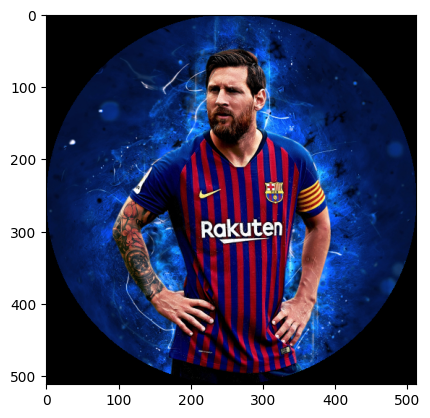

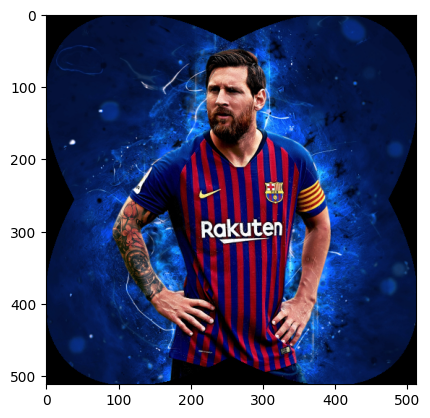

In [54]:

def main():
    print("---------- MENU ----------")
    print("1: Thay đổi độ sáng")
    print("2: Thay đổi độ tương phản")
    print("3: Lật ảnh (ngang - dọc)")
    print("4: Chuyển đổi ảnh RGB thành ảnh xám/ sepia")
    print("5: Làm mờ/ làm sắc nét")
    print("6: Cắt ảnh theo kích thước (cắt ở trung tâm)")
    print("7: Cắt ảnh theo khung hình tròn")
    print("8: Cắt ảnh theo khung là 2 hình ellip chéo nhau")

    img_name = input("Nhập tên ảnh, bao gồm đuôi file (vd: file.jpg): ")
    
    print("\nINPUT IMAGE:")
    # img = mpimage.imread(img_name)
    img = Image.open(img_name)
    img = np.array(img)
    img = img[:, :, :3]
    plt.imshow(img)
    plt.show()
    # plt.imsave('test.jpg')

    choice = int(input("Lựa chọn theo menu (1, 2, 3, ...): "))
    if choice == 1:
        brighter_img = increase_brightness(img, value=30)
        darker_img = decrease_brightness(img, value=30)
        print("BRIGHTER IMAGE:")
        plt.imshow(brighter_img)
        plt.show()
        export_file(brighter_img, img_name, "_brighter")

        print("DARKER IMAGE:")
        plt.imshow(darker_img)
        plt.show()
        export_file(darker_img, img_name, "_darker")

    elif choice == 2:
        contrast_img = adjust_contrast(img, value=1.5)
        print("CONTRAST-ADJUSTED IMAGE:")
        plt.imshow(contrast_img)
        plt.show()
        export_file(contrast_img, img_name, "_contrast")

    elif choice == 3:
        flipped_img = upside_down_img(img)
        print("UPSIDE-DOWN IMAGE:")
        plt.imshow(flipped_img)
        plt.show()
        export_file(flipped_img, img_name, "_upside_down")

        flipped_img = flip_left_right(img)
        print("LEFT-RIGHT FLIPPED IMAGE:")
        plt.imshow(flipped_img)
        plt.show()
        export_file(flipped_img, img_name, "_flip_left_right")


    elif choice == 4:
        grayscale_img = rgb_to_grayscale(img)
        sepia_img = rgb_to_sepia(img)

        print("GRAYSCALE IMAGE:")
        plt.imshow(grayscale_img, cmap='gray')
        plt.show()
        export_file(grayscale_img, img_name, "_grayscale")
        
        print("SEPIA IMAGE:")
        plt.imshow(sepia_img)
        plt.show()
        export_file(sepia_img, img_name, "_sepia")

    elif choice == 5:
        blurred_img = gaussian_blur(img)
        print("BLURRED IMAGE:")
        plt.imshow(blurred_img)
        plt.show()
        export_file(blurred_img, img_name, "_blur")

        sharpen_img = sharpen(blurred_img)
        print("SHARPEN IMAGE: ")
        plt.imshow(sharpen_img)
        plt.show()
        export_file(sharpen_img, img_name, "_sharpen")

    elif choice == 6:
        cropped_img = center_crop(img, height_crop=300, width_crop=300)
        print("CENTER-CROPPED IMAGE: ")
        plt.imshow(cropped_img)
        plt.show()
        export_file(cropped_img, img_name, "_center_crop")
    
    elif choice == 7:
        center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
        radius = img.shape[0] / 2
        circular_crop_img = circular_crop(img, center, radius)

        print("CIRCULAR-CROPPED IMAGE: ")
        plt.imshow(circular_crop_img)
        plt.show()
        export_file(circular_crop_img, img_name, "_circular_crop")

    elif choice == 8:
        center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
        ellips_crop_img = ellipsed_crop(img, center, axes=[320, 175], degree=45)
        plt.imshow(ellips_crop_img)
        plt.show()
        export_file(ellips_crop_img, img_name, "_ellips_crop")

    elif choice == 0:
        brighter_img = increase_brightness(img, value=30)
        darker_img = decrease_brightness(img, value=30)
        print("BRIGHTER IMAGE:")
        plt.imshow(brighter_img)
        plt.show()
        export_file(brighter_img, img_name, "_brighter")
        print("DARKER IMAGE:")
        plt.imshow(darker_img)
        plt.show()
        export_file(darker_img, img_name, "_darker")

        contrast_img = adjust_contrast(img, value=1.5)
        print("CONTRAST-ADJUSTED IMAGE:")
        plt.imshow(contrast_img)
        plt.show()
        export_file(contrast_img, img_name, "_contrast")
    

        flipped_img = upside_down_img(img)
        print("UPSIDE-DOWN IMAGE:")
        plt.imshow(flipped_img)
        plt.show()
        export_file(flipped_img, img_name, "_upside_down")
        flipped_img = flip_left_right(img)
        print("LEFT-RIGHT FLIPPED IMAGE:")
        plt.imshow(flipped_img)
        plt.show()
        export_file(flipped_img, img_name, "_flip_left_right")

        grayscale_img = rgb_to_grayscale(img)
        sepia_img = rgb_to_sepia(img)
        print("GRAYSCALE IMAGE:")
        plt.imshow(grayscale_img, cmap='gray')
        plt.show()
        export_file(grayscale_img, img_name, "_grayscale")
        print("SEPIA IMAGE:")
        plt.imshow(sepia_img)
        plt.show()
        export_file(sepia_img, img_name, "_sepia")

        blurred_img = gaussian_blur(img)
        print("BLURRED IMAGE:")
        plt.imshow(blurred_img)
        plt.show()
        export_file(blurred_img, img_name, "_blur")

        sharpen_img = sharpen(blurred_img)
        print("SHARPEN IMAGE: ")
        plt.imshow(sharpen_img)
        plt.show()
        export_file(sharpen_img, img_name, "_sharpen")

        cropped_img = center_crop(img, height_crop=300, width_crop=300)
        print("CENTER-CROPPED IMAGE: ")
        plt.imshow(cropped_img)
        plt.show()
        export_file(cropped_img, img_name, "_center_crop")

        center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
        radius = img.shape[0] / 2
        circular_crop_img = circular_crop(img, center, radius)
        print("CIRCULAR-CROPPED IMAGE: ")
        plt.imshow(circular_crop_img)
        plt.show()
        export_file(circular_crop_img, img_name, "_circular_crop")

        center = [int(img.shape[1] / 2), int(img.shape[0] / 2)]
        ellips_crop_img = ellipsed_crop(img, center, axes=[320, 175], degree=45)
        plt.imshow(ellips_crop_img)
        plt.show()
        export_file(ellips_crop_img, img_name, "_ellips_crop")

if __name__ == "__main__":
    main()



In [55]:
# pic_name = "messi.jpg"
# img = mpimage.imread(pic_name)
# print(img)

# pic_name = "lisa3.png"
# img = Image.open(pic_name)
# print(img)

# img = np.array(img)
# img = img[:, :, :3]
# print(img)

# plt.imshow(img)
# plt.show()

# new_img = increase_brightness(img, value=30)
# plt.imshow(new_img)
# plt.show()

In [56]:
# pic_name = "lisa3.png"
# img = mpimage.imread(pic_name)
# print(img)

